<a href="https://colab.research.google.com/github/MayJarung/IMAGE-PROCESSING/blob/main/Lab5_%E0%B8%82%E0%B9%89%E0%B8%AD3%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%97%E0%B8%B5%E0%B9%882.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
!pip install keras wrappers

  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-7b00cf84b7254d8eb5dc7727617fea98 from https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz has inconsistent name: expected 'wrappers', but metadata has 'wrappers-7b00cf84b7254d8eb5dc7727617fea98'
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrappers-0.1.8.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-277978886044425fa053f8b72b1f6c9b from https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrappers-0.1.8.tar.gz has inconsistent name: expected 'wrappers', but metadata has 'wrappers-277978

In [3]:
!pip install keras==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.9.0 which is incompatible.


In [4]:
# Import Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, losses

In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
bgr_img2 = cv2.imread("/content/drive/MyDrive/ImageProcessing/WinkCat.jpg")

rgb_img2 = cv2.cvtColor(bgr_img2, cv2.COLOR_BGR2RGB)

In [7]:
# Read image from fashion_mnist dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data() # load images from dataset
x_train = x_train/255.0  # normalized image intensity
x_test = x_test/255.0    # normalized image intensity
x_train, x_test= train_test_split(x_train, random_state=42, test_size=0.2) # create train data, test data
x_train, x_val = train_test_split(x_train, random_state=42, test_size=0.3) # create train data, validation data

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
x_train.shape, x_test.shape

((33600, 28, 28), (12000, 28, 28))

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

In [10]:
x_train.shape, x_test.shape , x_val.shape

((33600, 28, 28, 1), (12000, 28, 28, 1), (14400, 28, 28, 1))

เปลี่ยนค่า  noise_std = 1 noise_factor = 0.3 ให้ไม่เหมือนกับแบบแรก

In [11]:
# Prepare Gaussian Noise Function
def add_gaussian_noise(train_x):
  noise_mean = 0
  noise_std = 1
  noise_factor = 0.3
  train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape) )
  return train_x_noise

In [13]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

In [14]:
# Define parameters
Npic = 100  # จำนวนรูปภาพที่คุณต้องการสร้าง
rotation_range = 40  # ช่วงการหมุนภาพ (องศา)
width_shift_range = 0.2  # ช่วงการเลื่อนภาพในแนวนอน
height_shift_range = 0.2  # ช่วงการเลื่อนภาพในแนวตั้ง
shear_range = 0.2  # ช่วงการเบียดเอียง
zoom_range = 0.2  # ช่วงการซูม
horizontal_flip = True  # ทำการพลิกภาพแนวนอน (True/False)

In [15]:
for m in fill_method:
    datagen = ImageDataGenerator(rotation_range=rotation_range,
                                 width_shift_range=width_shift_range,
                                 height_shift_range=height_shift_range,
                                 shear_range=shear_range,
                                 zoom_range=zoom_range,
                                 horizontal_flip=horizontal_flip,
                                 preprocessing_function = add_gaussian_noise,
                                 fill_mode = m)

x_batch = datagen.flow(x_train, batch_size = 1)

In [16]:
x_test_noisy = []
x_train_noisy = []
x_val_noisy = []

In [17]:
# Define ImageDataGenerator with

for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_train_noisy.append(augmented_image)

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_test_noisy.append(augmented_image)

for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_val_noisy.append(augmented_image)

x_train_noisy = np.array(x_train_noisy)
x_test_noisy = np.array(x_test_noisy)
x_val_noisy = np.array(x_val_noisy)


In [18]:
x_train_noisy.shape

(33600, 28, 28, 1)

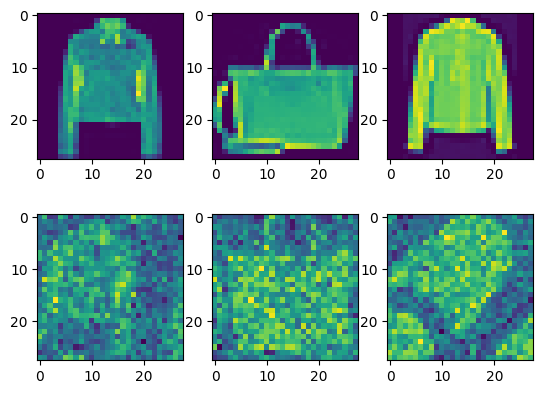

In [19]:
fig1, axs1 = plt.subplots(2, 3)
axs1[0, 0].imshow(x_train[0])
axs1[1, 0].imshow(x_train_noisy[0])
axs1[0, 1].imshow(x_test[0])
axs1[1, 1].imshow(x_test_noisy[0])
axs1[0, 2].imshow(x_val[0])
axs1[1, 2].imshow(x_val_noisy[0])

In [20]:
# ปรับ learning_rate จากแบบแรก
optimizer='adam'
learning_rate=0.001

In [21]:
# ปรับจำนวน convolution node ให้มันลดลงจากแบบแรก
input_img = Input(shape=(28,28,1))
x1 = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x6 = UpSampling2D((2, 2))(x5)
x7 = Conv2D(64, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(128, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(1, (3, 3), padding='same')(x8)
# Compile the model
autoencoder = Model(input_img, x9)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss=losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
# ปรับ epoch, batch_size ให้มันลดลงจากแบบแรก
bs = 256
eps = 35

In [23]:
callback = EarlyStopping(monitor='loss', patience=10)
history = autoencoder.fit_generator( datagen.flow(x_train, x_train, batch_size=bs),
                                      epochs=eps, steps_per_epoch = x_train.shape[0]//bs,
                                      validation_data=(x_val_noisy, x_val),
                                      callbacks=[callback],verbose=1)
# test batch_size , epoch, learning_rate,

<ipython-input-23-f4b7ec38664c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = autoencoder.fit_generator( datagen.flow(x_train, x_train, batch_size=bs),


Epoch 1/35
131/131 [==============================] - 34s 175ms/step - loss: 0.0719 - val_loss: 0.0643
Epoch 2/35
131/131 [==============================] - 23s 176ms/step - loss: 0.0623 - val_loss: 0.0599
Epoch 3/35
131/131 [==============================] - 19s 146ms/step - loss: 0.0586 - val_loss: 0.0572
Epoch 4/35
131/131 [==============================] - 20s 153ms/step - loss: 0.0566 - val_loss: 0.0555
Epoch 5/35
131/131 [==============================] - 20s 153ms/step - loss: 0.0553 - val_loss: 0.0543
Epoch 6/35
131/131 [==============================] - 20s 156ms/step - loss: 0.0540 - val_loss: 0.0537
Epoch 7/35
131/131 [==============================] - 20s 154ms/step - loss: 0.0532 - val_loss: 0.0526
Epoch 8/35
131/131 [==============================] - 20s 154ms/step - loss: 0.0525 - val_loss: 0.0537
Epoch 9/35
131/131 [==============================] - 20s 151ms/step - loss: 0.0520 - val_loss: 0.0521
Epoch 10/35
131/131 [==============================] - 21s 156ms/step - l

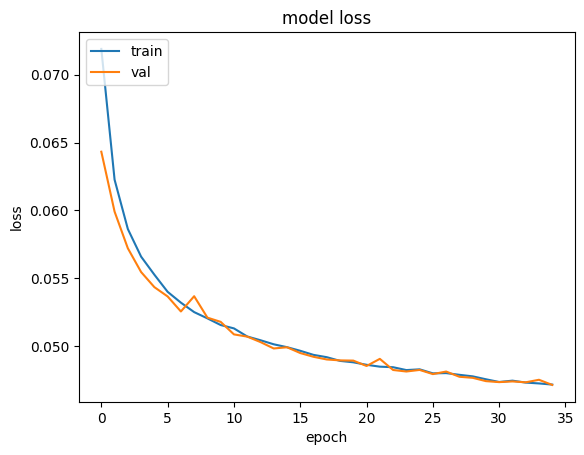

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
predictions_test = autoencoder.predict_generator(x_test_noisy)

<ipython-input-27-ff09df9e1d8a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_test = autoencoder.predict_generator(x_test_noisy)


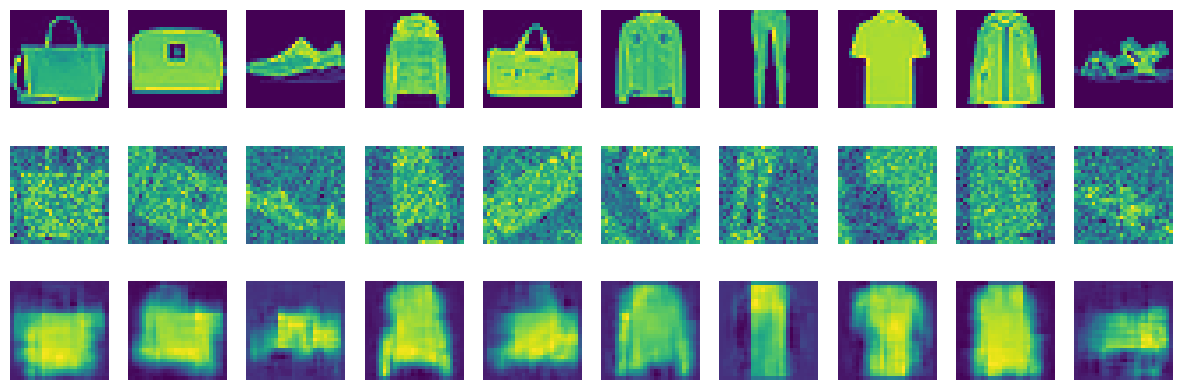

In [28]:
fig1, axs1 = plt.subplots(3, 10,  figsize=(15, 5))
axs1[0, 0].imshow(x_test[0])
axs1[1, 0].imshow(x_test_noisy[0])
axs1[2, 0].imshow(predictions_test[0])
axs1[0, 1].imshow(x_test[1])
axs1[1, 1].imshow(x_test_noisy[1])
axs1[2, 1].imshow(predictions_test[1])
axs1[0, 2].imshow(x_test[2])
axs1[1, 2].imshow(x_test_noisy[2])
axs1[2, 2].imshow(predictions_test[2])
axs1[0, 3].imshow(x_test[3])
axs1[1, 3].imshow(x_test_noisy[3])
axs1[2, 3].imshow(predictions_test[3])
axs1[0, 4].imshow(x_test[4])
axs1[1, 4].imshow(x_test_noisy[4])
axs1[2, 4].imshow(predictions_test[4])
axs1[0, 5].imshow(x_test[5])
axs1[1, 5].imshow(x_test_noisy[5])
axs1[2, 5].imshow(predictions_test[5])
axs1[0, 6].imshow(x_test[6])
axs1[1, 6].imshow(x_test_noisy[6])
axs1[2, 6].imshow(predictions_test[6])
axs1[0, 7].imshow(x_test[7])
axs1[1, 7].imshow(x_test_noisy[7])
axs1[2, 7].imshow(predictions_test[7])
axs1[0, 8].imshow(x_test[8])
axs1[1, 8].imshow(x_test_noisy[8])
axs1[2, 8].imshow(predictions_test[8])
axs1[0, 9].imshow(x_test[9])
axs1[1, 9].imshow(x_test_noisy[9])
axs1[2, 9].imshow(predictions_test[9])

for ax in axs1.flatten():
    ax.axis('off')
